<a href="https://colab.research.google.com/github/Stallon-niranjan/Inkers_EIP_WDocs/blob/master/Session3_EVA_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D,Convolution2D, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop,Adam
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


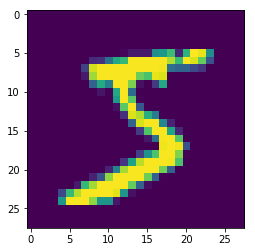

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 10))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 10)        650       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 10)        330       
__________

In [0]:
adam = Adam(lr=0.0003, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
60000/60000 [==============================] - 4s 65us/step - loss: 0.3628 - acc: 0.9738
Epoch 2/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.2755 - acc: 0.9809
Epoch 3/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.2211 - acc: 0.9835
Epoch 4/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.1827 - acc: 0.9858
Epoch 5/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.1533 - acc: 0.9878
Epoch 6/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.1313 - acc: 0.9888
Epoch 7/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.1126 - acc: 0.9898
Epoch 8/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0998 - acc: 0.9903
Epoch 9/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0861 - acc: 0.9913
Epoch 10/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0770 - acc: 0.9916

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the Validation Accuracy to Validation Dataset

In [15]:
print(score)

[0.04956148732900619, 0.9917]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[8.1067393e-04 2.8377233e-04 2.2642999e-03 8.6019345e-04 1.1884306e-03
  1.4051857e-03 7.9345494e-04 9.9108607e-01 7.8146870e-04 5.2639790e-04]
 [7.0799317e-04 1.1913712e-03 9.8981732e-01 8.6020521e-04 4.7658850e-04
  5.3991083e-05 3.6828553e-03 1.5020024e-04 1.2767914e-04 2.9317737e-03]
 [8.5014978e-04 9.8878235e-01 1.1239650e-03 8.5170992e-04 7.4713718e-04
  3.4278051e-03 1.0862476e-03 1.3134336e-03 7.5387722e-04 1.0633179e-03]
 [9.9015421e-01 9.9016784e-04 7.9838885e-04 6.8019069e-04 2.4838571e-03
  1.0363661e-03 1.4319526e-03 1.6902231e-03 3.0737862e-04 4.2710800e-04]
 [4.5832311e-04 9.9860865e-04 1.7520320e-04 4.1726415e-04 9.9455005e-01
  9.5014903e-04 2.9870105e-04 6.0197705e-04 8.9342764e-04 6.5622677e-04]
 [2.3903421e-03 9.8915023e-01 1.0387793e-03 4.8457496e-04 1.3809088e-03
  2.1595156e-03 9.4981823e-04 1.2823879e-03 4.3464033e-04 7.2886056e-04]
 [1.6184137e-03 6.4197704e-03 9.8837717e-03 1.0239625e-03 9.6258414e-01
  9.6728880e-04 8.2438048e-03 4.6287122e-04 6.3531427e-03 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

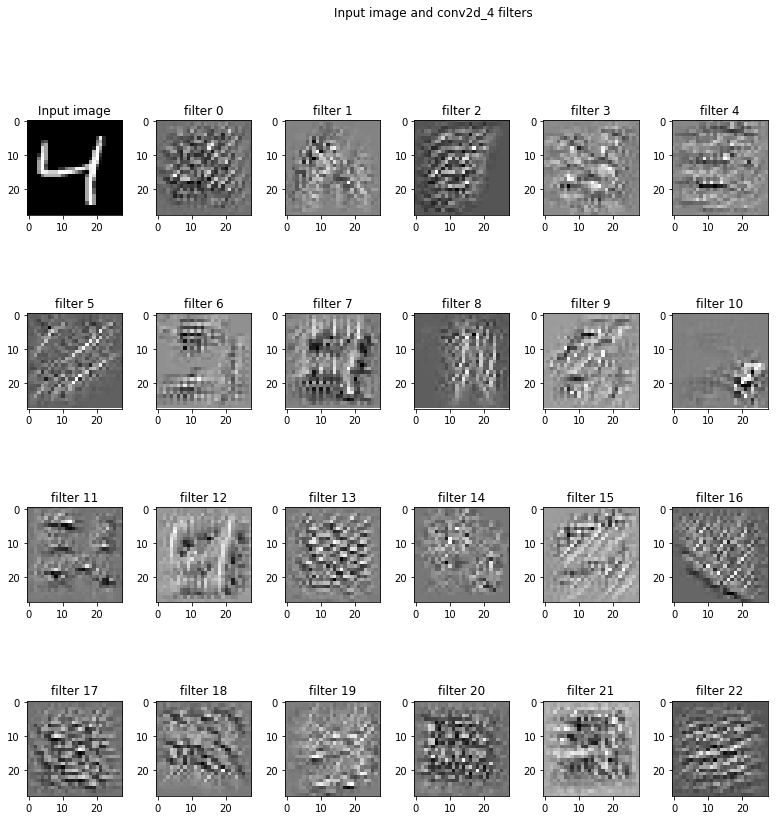

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()